In [1]:
import pandas as pd #for data manipulation and analysis
import numpy as np  #for numerical operations and array manipulation
import seaborn as sns #for advanced data visualization
import matplotlib.pyplot as plt #for data visualization
%matplotlib inline 
import os # provides a way to interact with the file system, directories, and other operating system
import missingno as msno # missingno is a Python library for visualizing missing data in datasets.
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS 
from PIL import Image 
import squarify
import plotly.express as px

In [3]:
os.chdir("D:\jupyter workbooks\datasets")

In [4]:
netflixdf = pd.read_csv('netflix_titles.csv')
netflixdf.head() # loading first five records of dataframe

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# loading last five records of dataframe
netflixdf.tail()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
#checking dataframe dimensionality. (rows x columns)
dataset_shape = netflixdf.shape
print("The dataset has {} rows and {} columns".format(*netflixdf.shape))

The dataset has 8807 rows and 11 columns


In [9]:
#returning the number of elements in a DataFrame
netflixdf.size 

96877

In [12]:
#displaying a summary of a DataFrame
netflixdf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   show_id      8807 non-null   object
 1   type         8807 non-null   object
 2   title        8807 non-null   object
 3   director     6173 non-null   object
 4   cast         7982 non-null   object
 5   country      7976 non-null   object
 6   date_added   8797 non-null   object
 7   rating       8803 non-null   object
 8   duration     8804 non-null   object
 9   listed_in    8807 non-null   object
 10  description  8807 non-null   object
dtypes: object(11)
memory usage: 757.0+ KB


In [13]:
#returning a list of column names in a DataFrame
netflixdf.columns 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
#computing the number of duplicated rows 
netflixdf.duplicated().sum()

0

In [17]:
#counting the number of missing values
netflixdf.isna().sum().sort_values(ascending=False)

director       2634
country         831
cast            825
date_added       10
rating            4
duration          3
show_id           0
type              0
title             0
listed_in         0
description       0
dtype: int64

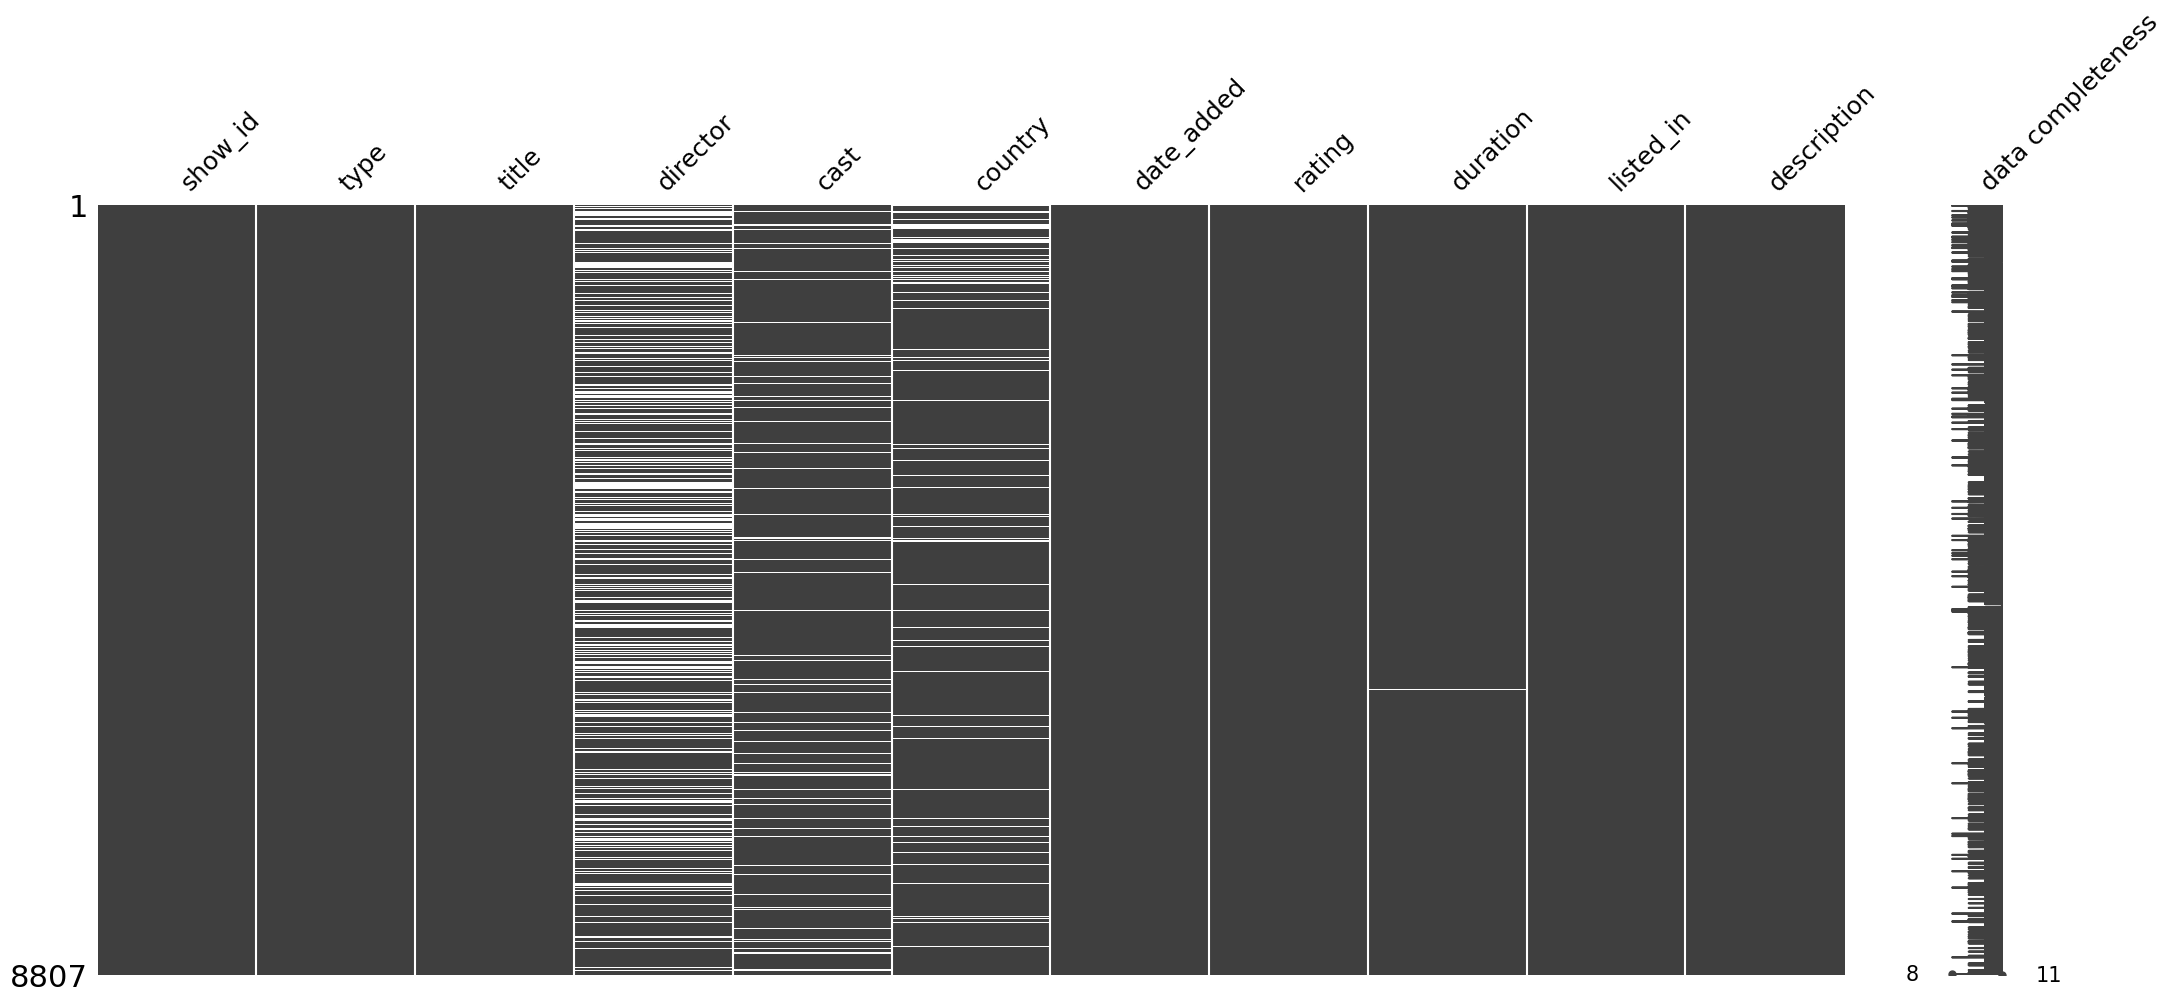

In [24]:
#matrix plot for visualizing  the locations of missing values 
msno.matrix(netflixdf, fontsize=18, labels=True, sparkline=True)
plt.show()

In [25]:
#Calculating Percentages of missing  Values 
missing_Values_pect =((netflixdf.isna().sum()/len(netflixdf))*100).round(2).sort_values(ascending=False)
missing_Values_pect

director       29.91
country         9.44
cast            9.37
date_added      0.11
rating          0.05
duration        0.03
show_id         0.00
type            0.00
title           0.00
listed_in       0.00
description     0.00
dtype: float64

In [26]:
#Handling Missing values
netflixdf.drop(columns=['director'],axis=1, inplace =True) # dropping Director Column
netflixdf['country'].fillna('no_Country',inplace=True) # Replacing null values with "no_country"
netflixdf['cast'].fillna('no_cast',inplace=True) # Replacing null values with "no_cast"
netflixdf.dropna(inplace=True) # dropping rows with null values 

In [27]:
netflixdf.isna().sum().sum()

0

In [28]:
netflixdf.dtypes

show_id        object
type           object
title          object
cast           object
country        object
date_added     object
rating         object
duration       object
listed_in      object
description    object
dtype: object

In [29]:
#changing date_added data type to date_time
netflixdf['date_added'] = pd.to_datetime(netflixdf['date_added'])
netflixdf['year_added'] = netflixdf['date_added'].dt.year # extracting year column from date_added column
netflixdf['month_added'] = netflixdf['date_added'].dt.strftime('%b')  # extracting month column from date_added column

In [30]:
#Create a new genre column based on keywords in the listed_in column
netflixdf['genre'] = 'Other'
netflixdf.loc[netflixdf['listed_in'].str.contains('Drama'), 'genre'] = 'Drama'
netflixdf.loc[netflixdf['listed_in'].str.contains('Comedy'), 'genre'] = 'Comedy'
netflixdf.loc[netflixdf['listed_in'].str.contains('Action'), 'genre'] = 'Action'
netflixdf.loc[netflixdf['listed_in'].str.contains('Horror'), 'genre'] = 'Horror'
netflixdf.loc[netflixdf['listed_in'].str.contains('Documentaries'), 'genre'] = 'Documentaries'

In [31]:
#checking dataframe headers
netflixdf.keys()

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added', 'rating',
       'duration', 'listed_in', 'description', 'year_added', 'month_added',
       'genre'],
      dtype='object')

In [36]:
# re-arranging columns
netflixdf = netflixdf.reindex(columns=['show_id', 'type', 'title', 'cast', 'country', 'date_added','year_added','month_added',
                                       'rating', 'duration', 'listed_in','genre', 'description'])

In [37]:
netflixdf.head(2)

,show_id,type,title,cast,country,date_added,year_added,month_added,rating,duration,listed_in,genre,description
0,s1,Movie,Dick Johnson Is Dead,no_cast,United States,2021-09-25,2021,Sep,PG-13,90 min,Documentaries,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Sep,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Drama,"After crossing paths at a party, a Cape Town t..."


In [43]:
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   show_id      8790 non-null   object        
 1   type         8790 non-null   object        
 2   title        8790 non-null   object        
 3   cast         8790 non-null   object        
 4   country      8790 non-null   object        
 5   date_added   8790 non-null   datetime64[ns]
 6   year_added   8790 non-null   int64         
 7   month_added  8790 non-null   object        
 8   rating       8790 non-null   object        
 9   duration     8790 non-null   object        
 10  listed_in    8790 non-null   object        
 11  genre        8790 non-null   object        
 12  description  8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 961.4+ KB


# visualizations

In [47]:
#checking unique values in each column
netflixdf.nunique()

show_id        8790
type              2
title          8787
cast           7679
country         749
date_added     1713
year_added       14
month_added      12
rating           14
duration        220
listed_in       513
genre             6
description    8758
dtype: int64

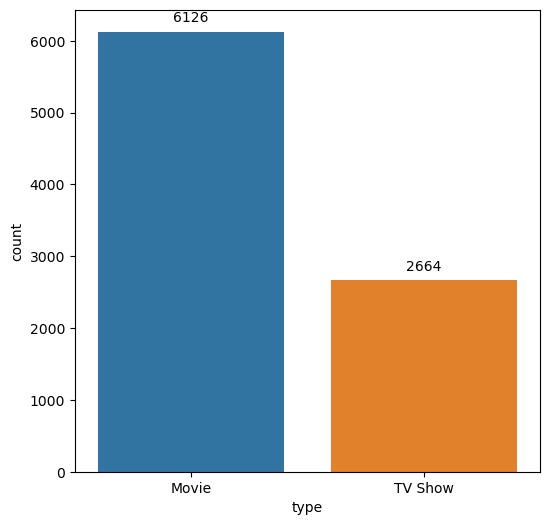

In [51]:
# count plot of types 
plt.figure(figsize=(6,6))
ax = sns.countplot(x='type', data=netflixdf)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

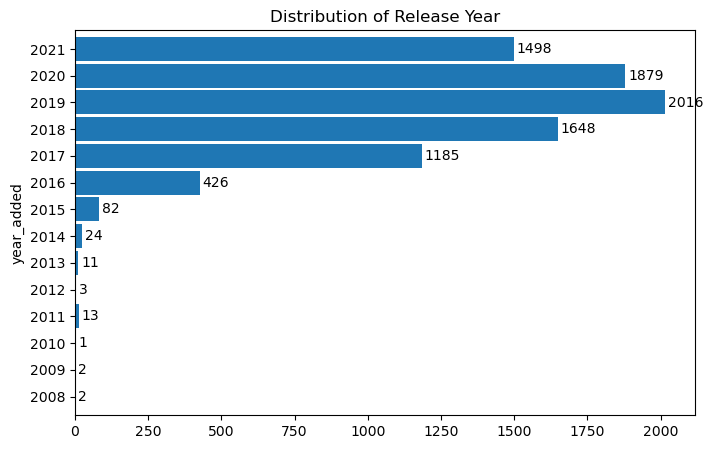

In [69]:
# group the data by release year and count the number of occurrences
year_counts = netflixdf.groupby('year_added')['show_id'].count()

# create the horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 5))
year_counts.plot.barh(ax=ax,width=0.9)
# set  title
ax.set_title('Distribution of Release Year')

# add data labels to the bars
for i, v in enumerate(year_counts.values):
    ax.annotate(str(v), xy=(v + 10, i - 0.15))
    
plt.show()

In [73]:
countrydf= netflixdf.groupby(['year_added', 'country']).size().reset_index(name='counts')



In [77]:
fig = px.choropleth(countrydf, 
                    locations='country', 
                    locationmode='country names', 
                    color='counts',
                    animation_frame='year_added',
                    range_color=[0, 100],
                   hover_name='country')
fig.show()


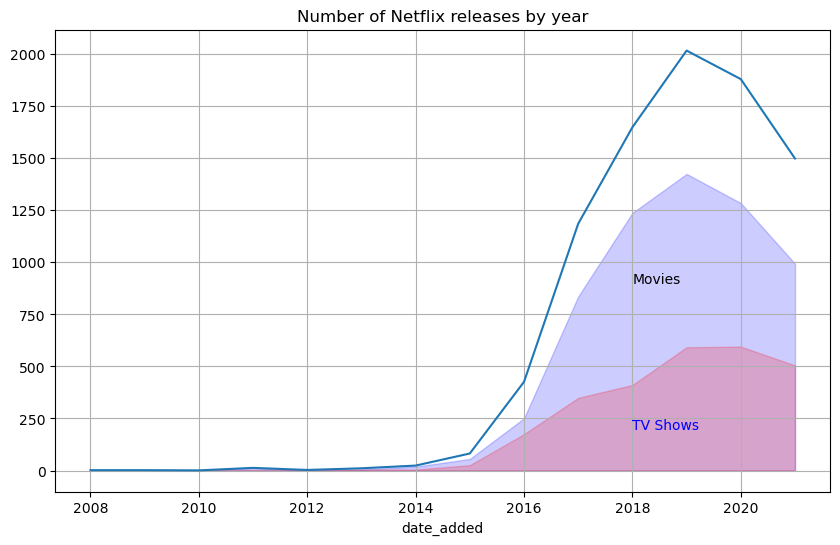

In [84]:


# Create separate dataframes for movies and TV shows
movies_df = netflixdf[netflixdf['type'] == 'Movie']
tv_shows_df = netflixdf[netflixdf['type'] == 'TV Show']

# Get the count of movies and TV shows released in each year
movies_count = movies_df['year_added'].value_counts().sort_index()
tv_shows_count = tv_shows_df['year_added'].value_counts().sort_index()
# Plot an area map for movies and TV shows
plt.fill_between(movies_count.index, movies_count.values, alpha=0.2,color='blue',label='Movies')
plt.fill_between(tv_shows_count.index, tv_shows_count.values, alpha=0.2,color='red', label='TV Shows')

# Put legend names inside the area map
plt.text(2018, 900, 'Movies', fontsize=10, color='black')
plt.text(2018, 200, 'TV Shows', fontsize=10, color='blue')

# Group the Netflix data by year and count the number of entries in each group
year_counts = netflixdf.groupby(netflixdf['date_added'].dt.year).size()

# Create a line plot of the total  number of releases by year
year_counts.plot(kind='line', figsize=(10, 6), grid=True,
                 title='Number of Netflix releases by year')
plt.show()

In [90]:
# Create a DataFrame of rating counts
rating_counts = netflixdf['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']

# Create a treemap
fig = px.treemap(rating_counts, path=['rating'], values='count',
                 color='count', hover_data=['rating', 'count'],
                 color_continuous_scale='Blues', width=800, height=500)

# Add borders to the rectangles
fig.data[0].marker.line = dict(width=1, color='yellow')

# Show the treemap
fig.show()

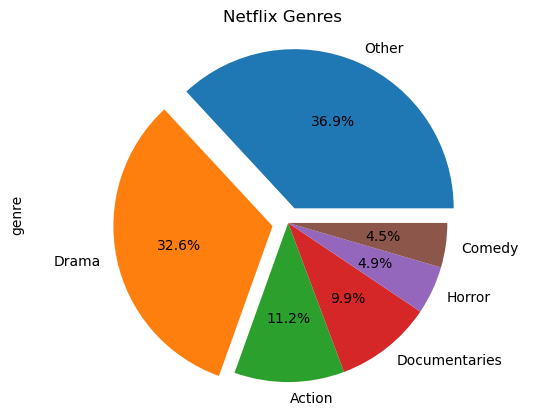

In [95]:
# Extract the genre column
genres = netflixdf['genre']

# Count the number of occurrences of each genre
genre_counts = genres.value_counts()
# create pie chart with exploding segments
explode = (0.1,0.1,0,0,0,0) # set which segments to explode
# Plot the genre pie chart
genre_counts.plot.pie(explode=explode,autopct='%1.1f%%')
plt.title('Netflix Genres')
plt.axis('equal')

# Show the genre pie chart
plt.show()

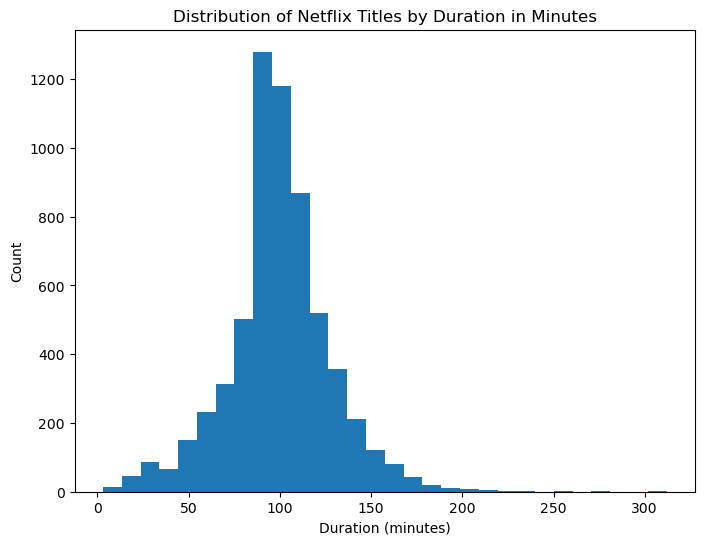

Text(0.5, 1.0, 'Distribution of Netflix Titles by Duration in Seasons')

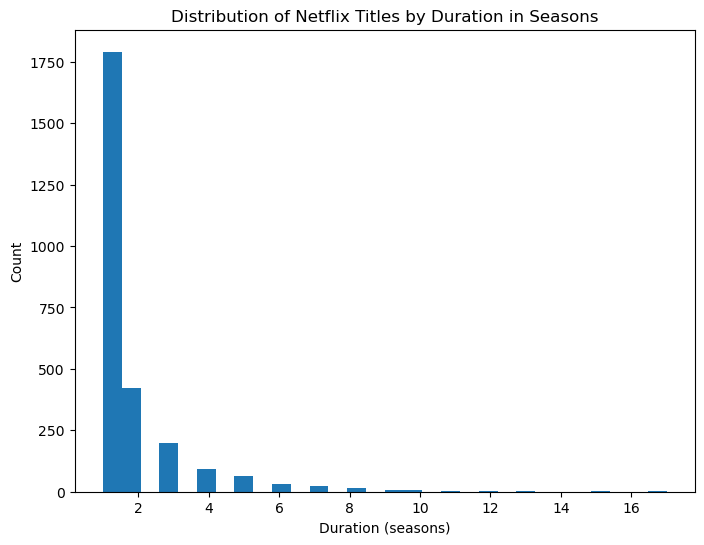

In [97]:
# Extract the duration in minutes and seasons
duration = netflixdf['duration'].str.extract('(\d+).*?(\w+)', expand=False)
duration.columns = ['count', 'unit']
duration['count'] = duration['count'].astype(int)
duration['count'] = duration.apply(lambda row: row['count'] * 60 if row['unit'] == 'h' else row['count'], axis=1)
duration['unit'] = duration.apply(lambda row: 'minutes' if row['unit'] == 'min' else 'seasons', axis=1)

# Create a histogram of the duration in minutes
minutes = duration[duration['unit'] == 'minutes']
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(minutes['count'], bins=30)

# Add labels and title
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Count')
ax.set_title('Distribution of Netflix Titles by Duration in Minutes')

# Show the plot
plt.show()

# Create a histogram of the duration in seasons
seasons = duration[duration['unit'] == 'seasons']
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(seasons['count'], bins=30)

# Add labels and title
ax.set_xlabel('Duration (seasons)')
ax.set_ylabel('Count')
ax.set_title('Distribution of Netflix Titles by Duration in Seasons')

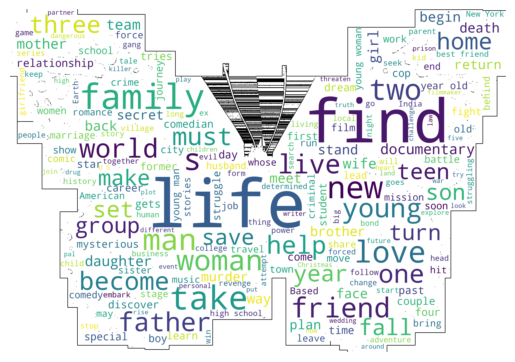

In [98]:
# Filter for movies
moviesdf = netflixdf[netflixdf['type'] == 'Movie']

# Concatenate all the descriptions into a single string
movie_desc = ' '.join(moviesdf['description'])

# Create a butterfly-shaped mask using PIL
mask = np.array(Image.open('butterfly.png'))

# Create a WordCloud object and generate the wordcloud
wc = WordCloud(background_color='white', mask=mask, contour_width=3, contour_color='black')
wc.generate(movie_desc)

# Display the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [100]:
tv_shows = netflixdf[netflixdf['type'] == 'Movie']

# group the data by country and count the number of TV shows in each country
tv_shows_by_country = tv_shows.groupby('country')['show_id'].count()

# sort the counts in descending order and get the top 10 countries
top_10_countries = tv_shows_by_country.sort_values(ascending=False).head(10)

# display the top 10 countries
print(top_10_countries) 

country
United States     2055
India              893
no_Country         439
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Name: show_id, dtype: int64


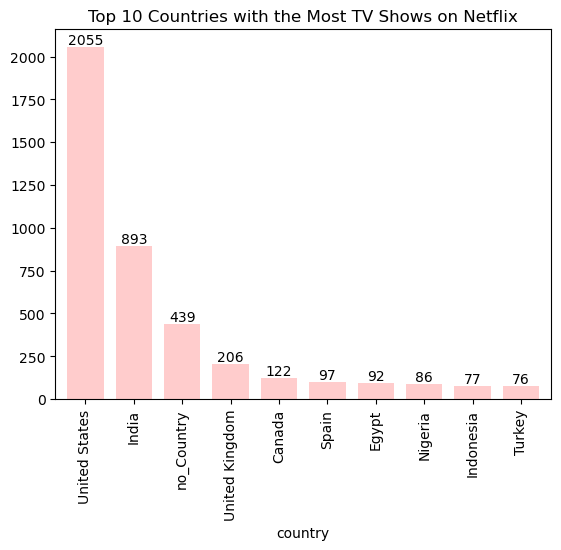

In [107]:
# plot a bar graph of the top 10 countries
top_10_countries.plot(x='Number of Movies',kind='bar',width=0.75,color='red',alpha=0.2)
for i, v in enumerate(top_10_countries.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# set the title and axis labels
plt.title("Top 10 Countries with the Most TV Shows on Netflix")

# display the plot
plt.show()

In [108]:
indian_tv_shows = netflixdf[(netflixdf['type'] == 'TV Show') & (netflixdf['country'] == 'India')]
total_indian_tv_shows = indian_tv_shows.shape[0]
print("Total Indian TV shows:", total_indian_tv_shows)

Total Indian TV shows: 79


In [109]:
tv_14_movies_USA = netflixdf[(netflixdf['type'] == 'Movie') & 
                              (netflixdf['rating'] == 'TV-14') & (netflixdf['country'] == 'United States')]
tv_14_movies_USA.to_csv('USA_Tv14',index=False)


In [123]:
USAdf= pd.read_csv('USA_Tv14')
USAdf.shape

(213, 13)

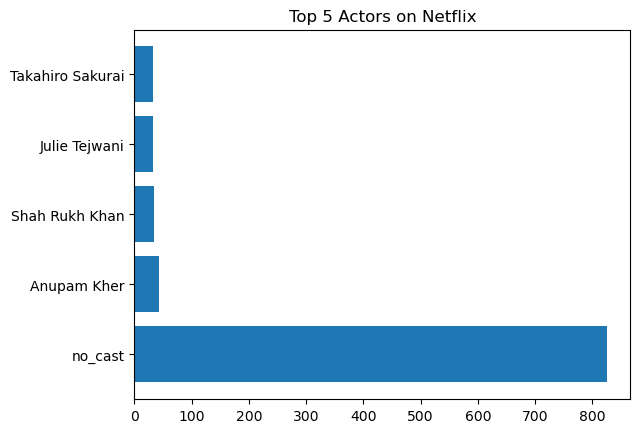

In [125]:
# Count the number of occurrences of each actor
actor_counts = netflixdf['cast'].str.split(', ').explode().value_counts()

# Select the top 5 actors
top_actors = actor_counts.head(5)

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_actors.index, top_actors.values)

# Add labels and title
ax.set_title('Top 5 Actors on Netflix')

# Show the plot
plt.show()